In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import stats

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
# load csv as dataframe
df1=pd.read_csv(r'C:\Users\syast\OneDrive\Documents\Data Analysis Practice\Movies Project\movies.csv')

In [4]:
df1.head()

,movie_id,title,budget,homepage,overview,popularity,release_date,revenue,runtime,movie_status,tagline,vote_average,vote_count
0,5,Four Rooms,4000000,NaN,It's Ted the Bellhop's first night on the job....,22.876230,1995-12-09,4300000,98,Released,Twelve outrageous guests. Four scandalous requ...,6.5,530
1,11,Star Wars,11000000,http://www.starwars.com/films/star-wars-episod...,Princess Leia is captured and held hostage by ...,126.393695,1977-05-25,775398007,121,Released,"A long time ago in a galaxy far, far away...",8.1,6624
2,12,Finding Nemo,94000000,http://movies.disney.com/finding-nemo,"Nemo, an adventurous young clownfish, is unexp...",85.688789,2003-05-30,940335536,100,Released,"There are 3.7 trillion fish in the ocean, they...",7.6,6122
3,13,Forrest Gump,55000000,NaN,A man with a low IQ has accomplished great thi...,138.133331,1994-07-06,677945399,142,Released,"The world will never be the same, once you've ...",8.2,7927
4,14,American Beauty,15000000,http://www.dreamworks.com/ab/,"Lester Burnham, a depressed suburban father in...",80.878605,1999-09-15,356296601,122,Released,Look closer.,7.9,3313


In [5]:
# find percentage of missing data in columns
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

movie_id - 0%
title - 0%
budget - 0%
homepage - 64%
overview - 0%
popularity - 0%
release_date - 0%
revenue - 0%
runtime - 0%
movie_status - 0%
tagline - 18%
vote_average - 0%
vote_count - 0%


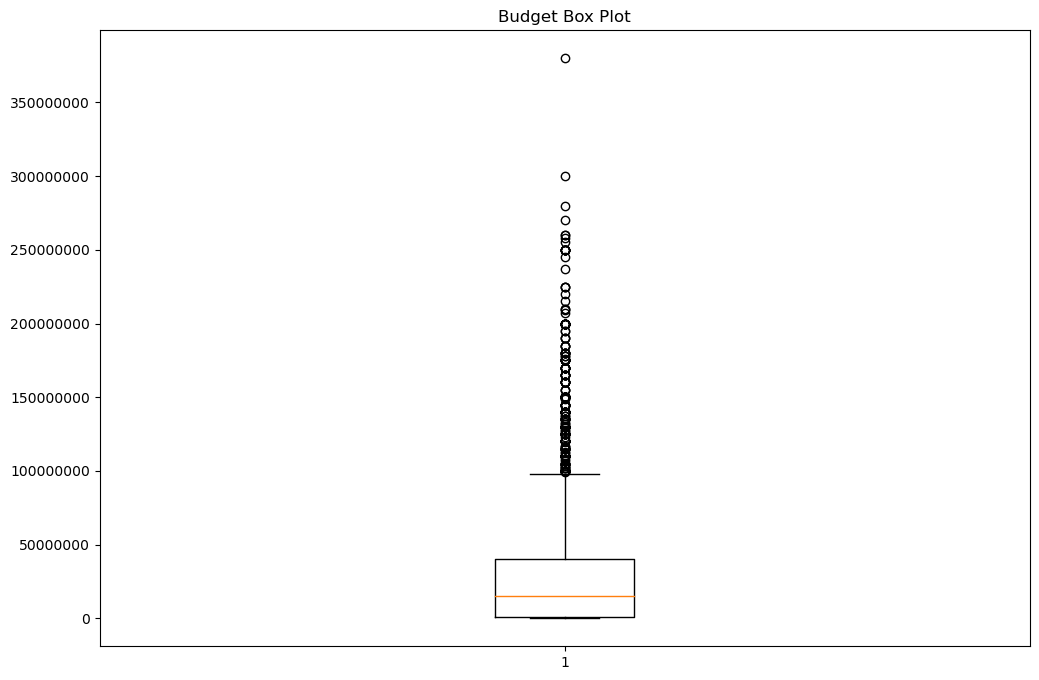

In [6]:
# find budget outliers
plt.boxplot(df1['budget'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Budget Box Plot')
plt.show()

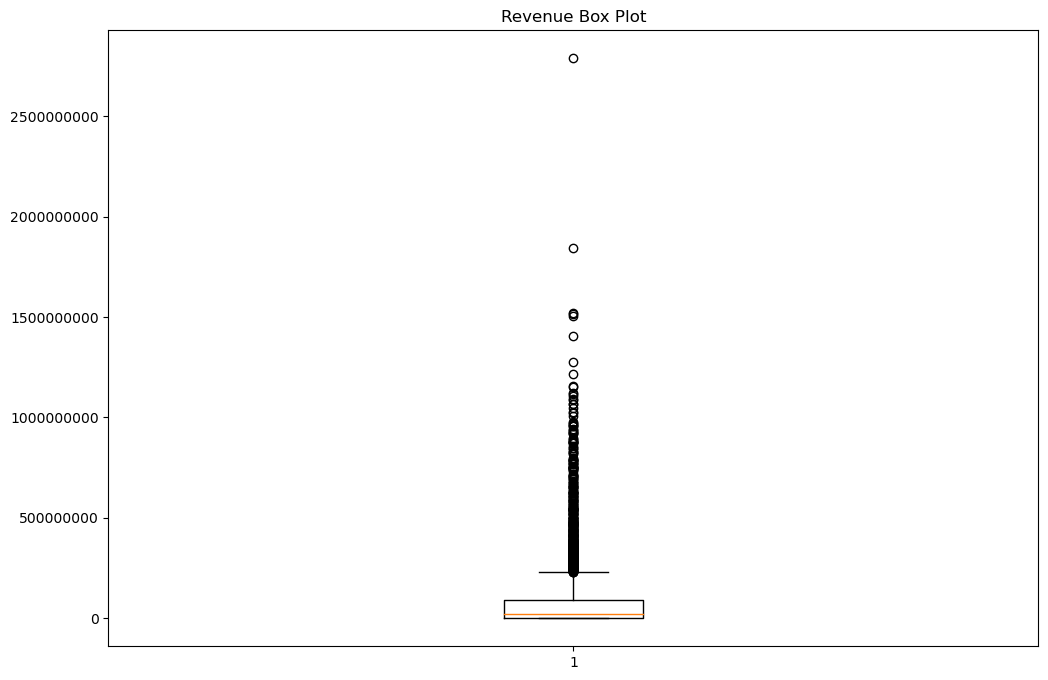

In [7]:
# find revenue outliers
plt.boxplot(df1['revenue'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Revenue Box Plot')
plt.show()

In [8]:
# get a sense of the movies with the highest budget
df1.sort_values('budget',ascending=False).head()

,movie_id,title,budget,homepage,overview,popularity,release_date,revenue,runtime,movie_status,tagline,vote_average,vote_count
595,1865,Pirates of the Caribbean: On Stranger Tides,380000000,http://disney.go.com/pirates/index-on-stranger...,Captain Jack Sparrow crosses paths with a woma...,135.413856,2011-05-14,1045713802,136,Released,Live Forever Or Die Trying.,6.4,4948
131,285,Pirates of the Caribbean: At World's End,300000000,http://disney.go.com/disneypictures/pirates/,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169,Released,"At the end of the world, the adventure begins.",6.9,4500
3983,99861,Avengers: Age of Ultron,280000000,http://marvel.com/movies/movie/193/avengers_ag...,When Tony Stark tries to jumpstart a dormant p...,134.279229,2015-04-22,1405403694,141,Released,A New Age Has Come.,7.3,6767
494,1452,Superman Returns,270000000,http://www.superman.com,Superman returns to discover his 5-year absenc...,57.925623,2006-06-28,391081192,154,Released,NaN,5.4,1400
3481,49529,John Carter,260000000,http://movies.disney.com/john-carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132,Released,"Lost in our world, found in another.",6.1,2124


In [9]:
# get a sense of the movies with the highest revenue
df1.sort_values('revenue',ascending=False).head()

,movie_id,title,budget,homepage,overview,popularity,release_date,revenue,runtime,movie_status,tagline,vote_average,vote_count
2702,19995,Avatar,237000000,http://www.avatarmovie.com/,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162,Released,Enter the World of Pandora.,7.2,11800
256,597,Titanic,200000000,http://www.titanicmovie.com,"84 years later, a 101-year-old woman named Ros...",100.025899,1997-11-18,1845034188,194,Released,Nothing on Earth could come between them.,7.5,7562
2861,24428,The Avengers,220000000,http://marvel.com/avengers_movie/,When an unexpected enemy emerges and threatens...,144.448633,2012-04-25,1519557910,143,Released,Some assembly required.,7.4,11776
4108,135397,Jurassic World,150000000,http://www.jurassicworld.com/,Twenty-two years after the events of Jurassic ...,418.708552,2015-06-09,1513528810,124,Released,The park is open.,6.5,8662
4204,168259,Furious 7,190000000,http://www.furious7.com/,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,2015-04-01,1506249360,137,Released,Vengeance Hits Home,7.3,4176


Text(0.5, 1.0, 'Reg Plot of Budget and Revenue')

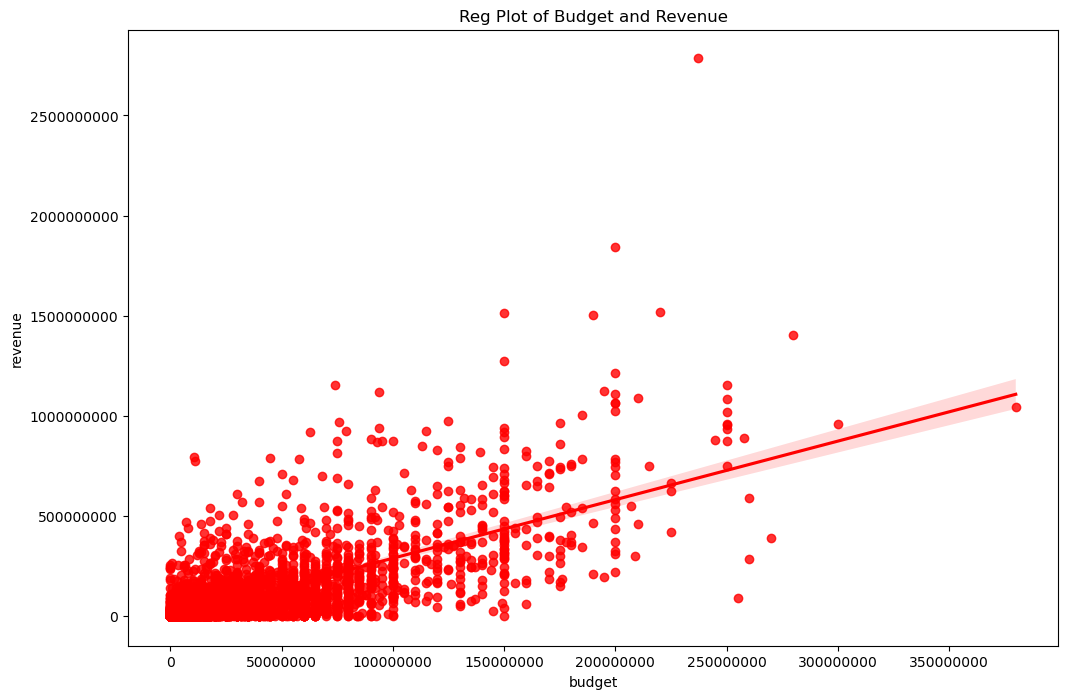

In [10]:
sns.regplot(df1,x='budget',y='revenue',color='red')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.title('Reg Plot of Budget and Revenue')

In [11]:
# correlation between numeric values
cr=df1[['budget','revenue','vote_average','popularity','runtime']].corr(method='pearson')

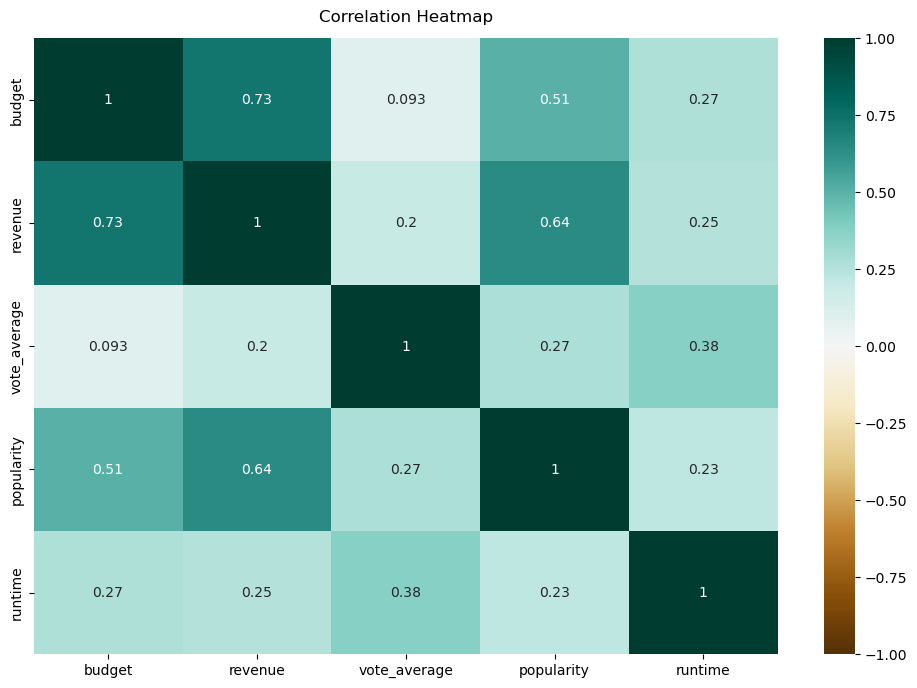

In [12]:
heatmap = sns.heatmap(cr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [43]:
# examining the Pearson coefficient and p-value
stats.pearsonr(df1['budget'],df1['revenue'])

PearsonRResult(statistic=0.7308228569244619, pvalue=0.0)

In [44]:
# creating a stripplot to show the revenue for movies in each vote tier
conditions=[(df1['vote_average']<2.0),
           (df1['vote_average']>=2.0) & (df1['vote_average']<4.0),
           (df1['vote_average']>=4.0) & (df1['vote_average']<6.0),
            (df1['vote_average']>=6.0) & (df1['vote_average']<8.0),
           (df1['vote_average']>=8.0)]

In [45]:
values=['low votes','below avg votes','avg votes','above avg votes','high votes']

In [46]:
df1['vote_tier']=np.select(conditions,values)

In [47]:
df1.head()

,movie_id,title,budget,homepage,overview,popularity,release_date,revenue,runtime,movie_status,tagline,vote_average,vote_count,vote_tier,pop_tier
0,5,Four Rooms,4000000,NaN,It's Ted the Bellhop's first night on the job....,22.876230,1995-12-09,4300000,98,Released,Twelve outrageous guests. Four scandalous requ...,6.5,530,above avg votes,above average popularity
1,11,Star Wars,11000000,http://www.starwars.com/films/star-wars-episod...,Princess Leia is captured and held hostage by ...,126.393695,1977-05-25,775398007,121,Released,"A long time ago in a galaxy far, far away...",8.1,6624,high votes,high popularity
2,12,Finding Nemo,94000000,http://movies.disney.com/finding-nemo,"Nemo, an adventurous young clownfish, is unexp...",85.688789,2003-05-30,940335536,100,Released,"There are 3.7 trillion fish in the ocean, they...",7.6,6122,above avg votes,high popularity
3,13,Forrest Gump,55000000,NaN,A man with a low IQ has accomplished great thi...,138.133331,1994-07-06,677945399,142,Released,"The world will never be the same, once you've ...",8.2,7927,high votes,high popularity
4,14,American Beauty,15000000,http://www.dreamworks.com/ab/,"Lester Burnham, a depressed suburban father in...",80.878605,1999-09-15,356296601,122,Released,Look closer.,7.9,3313,above avg votes,high popularity


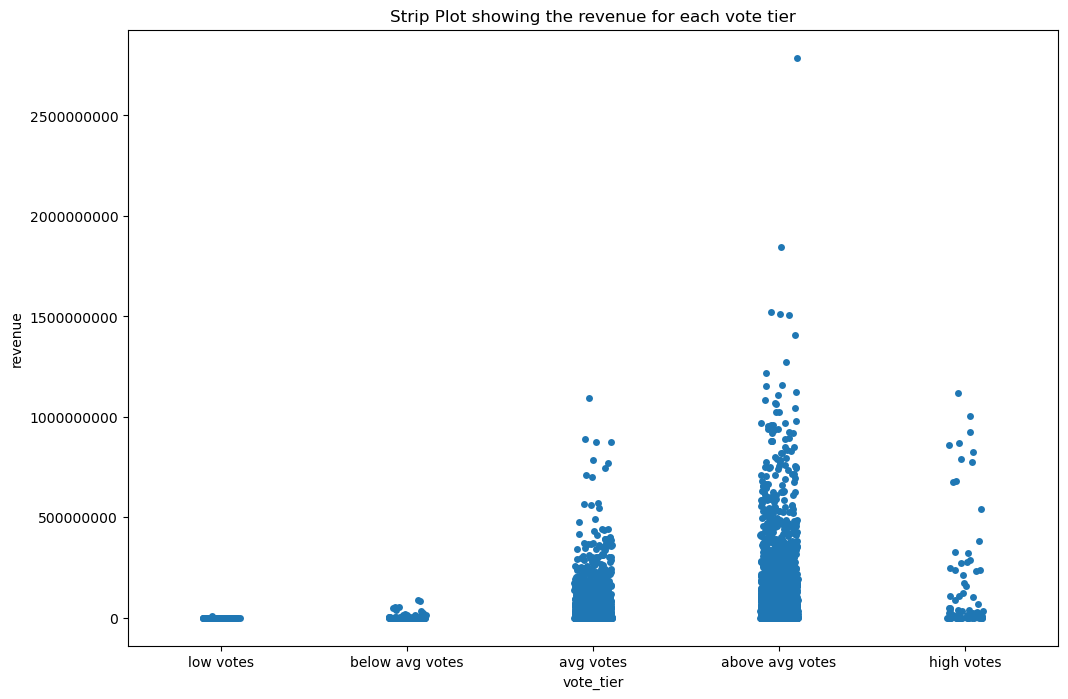

In [48]:
sns.stripplot(data=df1,x='vote_tier',y='revenue', order=values)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Strip Plot showing the revenue for each vote tier')
plt.show()

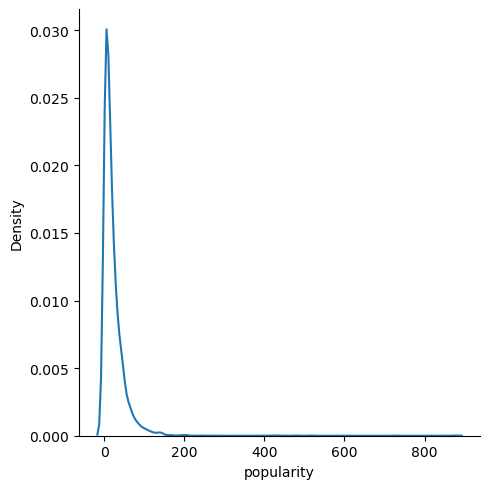

In [57]:
# investigate the popularity column
sns.displot(df1,x='popularity',kind='kde')

In [58]:
df1['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

In [59]:
# creating a stripplot to show the revenue for movies in each popularity tier
conditions=[(df1['popularity']<=4.668070),
           (df1['popularity']>4.668070) & (df1['popularity']<=12.921594),
           (df1['popularity']>12.921594) & (df1['popularity']<=28.313505),
            (df1['popularity']>28.313505)]

In [60]:
values=['low popularity','below average popularity','above average popularity','high popularity']

In [61]:
df1['pop_tier']=np.select(conditions,values)

In [62]:
df1.head()

,movie_id,title,budget,homepage,overview,popularity,release_date,revenue,runtime,movie_status,tagline,vote_average,vote_count,vote_tier,pop_tier
0,5,Four Rooms,4000000,NaN,It's Ted the Bellhop's first night on the job....,22.876230,1995-12-09,4300000,98,Released,Twelve outrageous guests. Four scandalous requ...,6.5,530,above avg votes,above average popularity
1,11,Star Wars,11000000,http://www.starwars.com/films/star-wars-episod...,Princess Leia is captured and held hostage by ...,126.393695,1977-05-25,775398007,121,Released,"A long time ago in a galaxy far, far away...",8.1,6624,high votes,high popularity
2,12,Finding Nemo,94000000,http://movies.disney.com/finding-nemo,"Nemo, an adventurous young clownfish, is unexp...",85.688789,2003-05-30,940335536,100,Released,"There are 3.7 trillion fish in the ocean, they...",7.6,6122,above avg votes,high popularity
3,13,Forrest Gump,55000000,NaN,A man with a low IQ has accomplished great thi...,138.133331,1994-07-06,677945399,142,Released,"The world will never be the same, once you've ...",8.2,7927,high votes,high popularity
4,14,American Beauty,15000000,http://www.dreamworks.com/ab/,"Lester Burnham, a depressed suburban father in...",80.878605,1999-09-15,356296601,122,Released,Look closer.,7.9,3313,above avg votes,high popularity


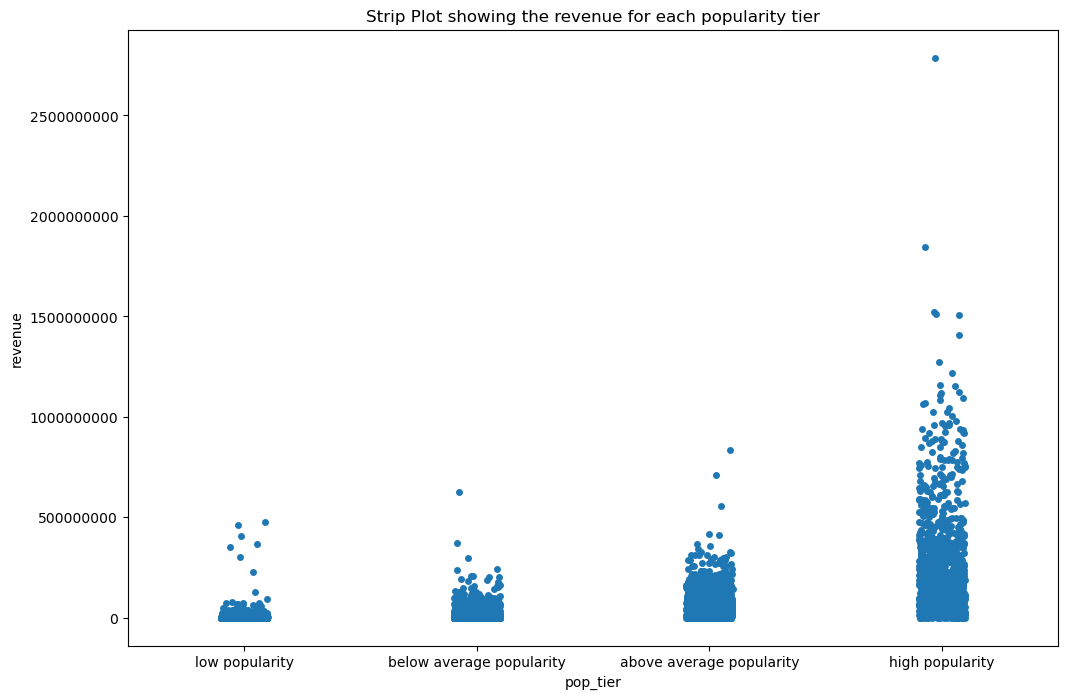

In [63]:
sns.stripplot(data=df1,x='pop_tier',y='revenue', order=values)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Strip Plot showing the revenue for each popularity tier')
plt.show()